In [423]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [424]:
data_2D = pd.read_csv('data/data2D.csv', header=None)
data_1000D = pd.read_csv('data/data1000D.csv', header=None)

In [425]:
data_1000D = np.array(data_1000D)

In [426]:
data_1000D.shape

(500, 1000)

In [427]:
def buggyPCA(X, d):
    X = np.array(X)
    U, S, VT = np.linalg.svd(X)
    pca_comps = VT[:d]
    reduced_X = np.dot(X, pca_comps.T)
    reconstructed_X = np.dot(reduced_X, pca_comps)
    return pca_comps, reduced_X, reconstructed_X

def demeanedPCA(X, d):
    X = np.array(X)
    X_demeaned = X - np.mean(X, axis=0)
    U, S, VT = np.linalg.svd(X_demeaned)
    pca_comps = VT[:d]
    reduced_X = np.dot(X_demeaned, pca_comps.T)
    reconstructed_X = np.dot(reduced_X, pca_comps) + np.mean(X, axis=0)
    return pca_comps, reduced_X, reconstructed_X

def normalizedPCA(X, d):
    X = np.array(X)
    X_demeaned = X - np.mean(X , axis = 0)
    X_normalized = X_demeaned/np.std(X_demeaned, axis=0)
    U, S, VT = np.linalg.svd(X_normalized)
    pca_comps = VT[:d]
    reduced_X = np.dot(X_normalized, pca_comps.T)
    reconstructed_X = np.dot(reduced_X, pca_comps)*np.std(X_demeaned, axis=0) + np.mean(X, axis =0)
    return pca_comps, reduced_X, reconstructed_X

In [428]:
def DRO(X, d):
    X = np.array(X)
    b = np.mean(X, axis=0)
    Y = X-b
    
    U, S, VT = np.linalg.svd(Y)
    s_d = np.diag(S[:d])
    pca_comps = VT[:d]
    reduced_Y = np.dot(Y, pca_comps.T.dot(np.linalg.inv(s_d)))
    A = pca_comps.T.dot(s_d)
    reconstructed_X = np.dot(reduced_Y, A.T)+ b
    
    return A, reduced_Y, reconstructed_X

In [429]:
def reconstruction_error(data, data_reconstructed):
    return np.sum([np.sum((x-y)**2) for x,y in zip(data, data_reconstructed)])

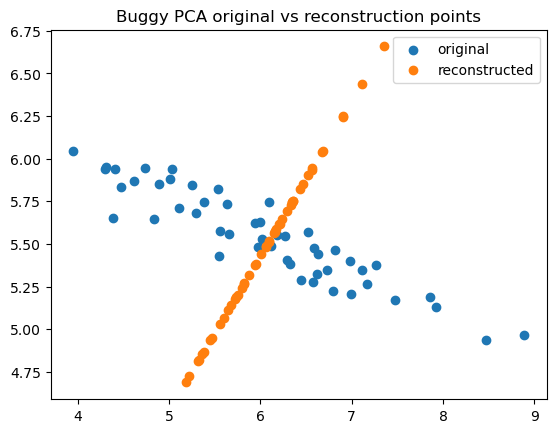

In [430]:
pca_comps, data_reduced, data_reconstructed = buggyPCA(data_2D, 1)

data_original = np.array(data_2D)
plt.scatter(data_original[:,0], data_original[:,1], label='original')
plt.scatter(data_reconstructed[:,0], data_reconstructed[:,1], label='reconstructed')
plt.legend()
plt.title("Buggy PCA original vs reconstruction points")
plt.savefig("Buggy PCA original vs reconstruction points.pdf")

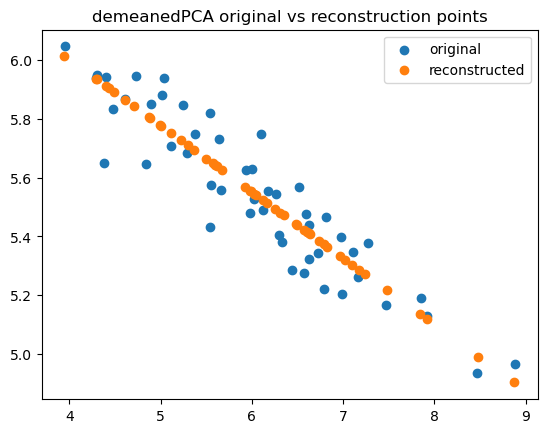

In [431]:
pca_comps, data_reduced, data_reconstructed = demeanedPCA(data_2D, 1)
data_original = np.array(data_2D)
plt.scatter(data_original[:,0], data_original[:,1], label='original')
plt.scatter(data_reconstructed[:,0], data_reconstructed[:,1], label='reconstructed')
plt.legend()
plt.title("demeanedPCA original vs reconstruction points")
plt.savefig("demeanedPCA original vs reconstruction points.pdf")

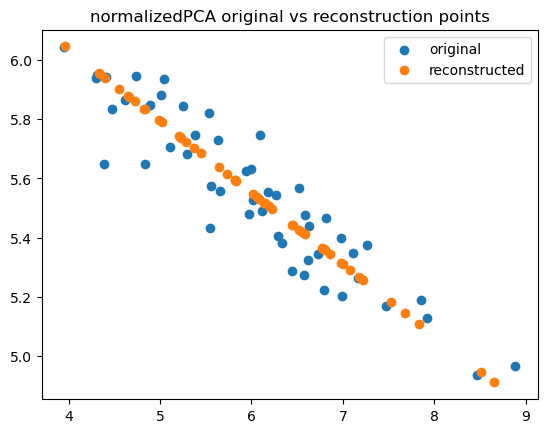

In [432]:
pca_comps, data_reduced, data_reconstructed = normalizedPCA(data_2D, 1)
data_original = np.array(data_2D)
plt.scatter(data_original[:,0], data_original[:,1], label='original')
plt.scatter(data_reconstructed[:,0], data_reconstructed[:,1], label='reconstructed')
plt.legend()
plt.title("normalizedPCA original vs reconstruction points")
plt.savefig("normalizedPCA original vs reconstruction points.pdf")

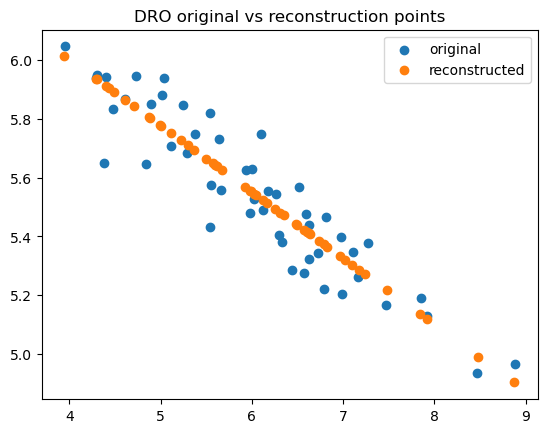

In [433]:
pca_comps, data_reduced, data_reconstructed = DRO(data_2D, 1)
data_original = np.array(data_2D)
plt.scatter(data_original[:,0], data_original[:,1], label='original')
plt.scatter(data_reconstructed[:,0], data_reconstructed[:,1], label='reconstructed')
plt.legend()
plt.title("DRO original vs reconstruction points")
plt.savefig("DRO original vs reconstruction points.pdf")

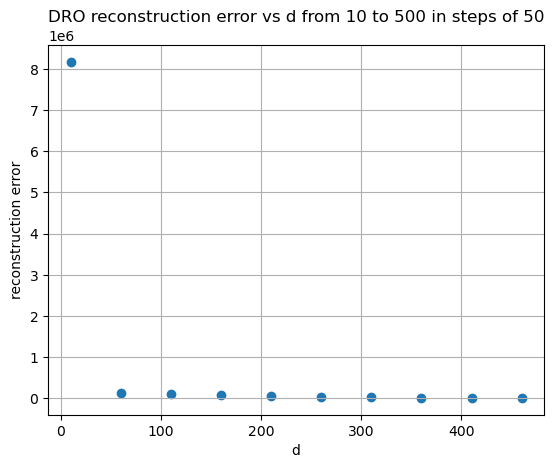

In [434]:
vals = []
for d in range(10, 500, 50):
    pca_comps, data_reduced, data_reconstructed = DRO(data_1000D, d)
    vals.append(reconstruction_error(data_1000D, data_reconstructed))

plt.scatter(range(10,500, 50), vals)
plt.grid()
plt.xlabel("d")
plt.ylabel("reconstruction error")
plt.title("DRO reconstruction error vs d from 10 to 500 in steps of 50")
plt.savefig("DRO deciding on d10_500.pdf")

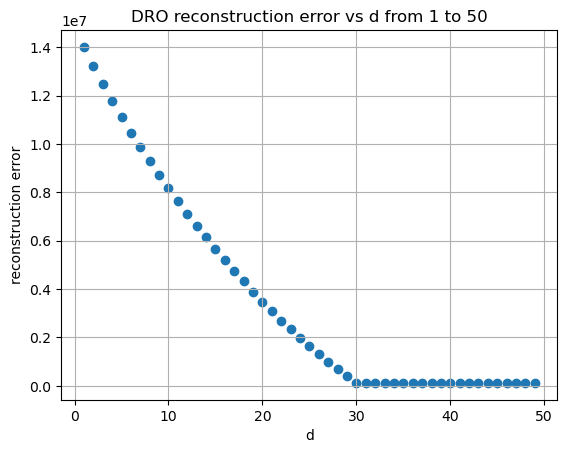

In [435]:
vals = []
for d in range(1, 50):
    pca_comps, data_reduced, data_reconstructed = DRO(data_1000D, d)
    vals.append(reconstruction_error(data_1000D, data_reconstructed))

plt.scatter(range(1,50), vals)
plt.grid()
plt.xlabel("d")
plt.ylabel("reconstruction error")
plt.title("DRO reconstruction error vs d from 1 to 50")
plt.savefig("DRO deciding on d1_50.pdf")

In [436]:
reconstruct_err = defaultdict(list)

In [437]:
for data, d in zip([data_2D, data_1000D], [1, 30]):
    pca_comps, data_reduced, data_reconstructed = buggyPCA(data, d)
    reconstruct_err['buggyPCA'].append(reconstruction_error(data, data_reconstructed))
    pca_comps, data_reduced, data_reconstructed = demeanedPCA(data, d)
    reconstruct_err['demeanedPCA'].append(reconstruction_error(data, data_reconstructed))
    pca_comps, data_reduced, data_reconstructed = normalizedPCA(data, d)
    reconstruct_err['normalizedPCA'].append(reconstruction_error(data, data_reconstructed))
    pca_comps, data_reduced, data_reconstructed = DRO(data, d)
    reconstruct_err['DRO'].append(reconstruction_error(data, data_reconstructed))

In [438]:
reconstruct_err

defaultdict(list,
            {'buggyPCA': [114.266231635787, 401365.6993101792],
             'demeanedPCA': [115.5165528420311, 136522.97948930142],
             'normalizedPCA': [112.80286362487861, 136814.29049881166],
             'DRO': [115.5165528420311, 136522.97948930142]})